<a href="https://colab.research.google.com/github/ManisMalakar/Artificial-Intelligence-Logic-Java/blob/main/ANN_for_Image_Classificaiton_for_Clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [15]:
#Loading the dataset
(x_train,y_train), (x_test,y_test)=fashion_mnist.load_data()

In [18]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [26]:
class_names=['0 Top or Tshirt','1 Trouser','2 Pullover','3 Dress','4 Coat','5 Sandal','6 Shirt','7 Sneakers','8 Bag','9 Ankle Boot']

In [27]:
print(class_names)

['0 Top or Tshirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneakers', '8 Bag', '9 Ankle Boot']


In [28]:
#Data Exploration

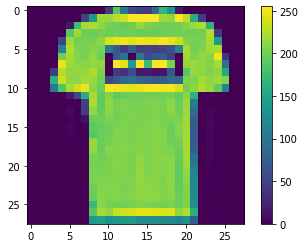

In [31]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [32]:
y_train[1]

0

In [34]:
#Normalizing the datset
x_train=x_train/255.0
x_test=x_test/255.0

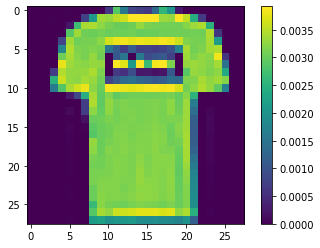

In [36]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [38]:
#Flattening the dataset
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [42]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [44]:
#Building the Model

In [45]:
#Defining an object
model=tf.keras.models.Sequential()
#Sequence of Layers

In [53]:
#Adding first fully connected hidden layer
#1) Number of neurons=256
#2) Activation Function=ReLU
#3) Input Shape=784
model.add(tf.keras.layers.Dense(units=256,activation='relu',input_shape=(784,)))

In [55]:
#Adding the second layer with dropout
model.add(tf.keras.layers.Dropout(0.33))
#Regularization Technique, preventing Overfitting

In [56]:
#Adding the output layer
#Units = 10
#Activation Function= Softmax
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [57]:
#Training the Model

In [59]:
#Compiling the Model
#1. Optimizer(minimize the loss function)=adam
#2. Loss Function(acts as guide for optimizer)=sparse_categorical_crossentropy
#3. Metrices=sparse_categorical_accuracy

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='sparse_categorical_accuracy')

In [ ]:
model.summary()

In [61]:
#Training the model
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0116 - sparse_categorical_accuracy: 0.6131
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4945 - sparse_categorical_accuracy: 0.8216
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4253 - sparse_categorical_accuracy: 0.8460
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3867 - sparse_categorical_accuracy: 0.8585
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3724 - sparse_categorical_accuracy: 0.8652
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3538 - sparse_categorical_accuracy: 0.8702
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3341 - sparse_categorical_accuracy: 0.8778
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3212 - sparse_categorical_accuracy: 0.8839
Epoch 9/10
1875/1875 [==========

In [64]:
#Model Evaulation and Prediction
test_loss, test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3471 - sparse_categorical_accuracy: 0.8772


In [65]:
#Model Prediction
y_pred=model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [69]:
print(y_pred[0])

9


In [72]:
y_pred[100],y_test[100] #Predicted and actual output

(3, 3)

In [76]:
#Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[796   2   9  44   3   0 140   0   6   0]
 [  4 959   2  30   3   0   2   0   0   0]
 [ 10   1 769  16  99   0 105   0   0   0]
 [ 12   6   7 922  17   0  35   0   1   0]
 [  0   1  83  53 790   0  73   0   0   0]
 [  0   0   0   0   0 942   0  27   1  30]
 [101   2  60  41  62   0 725   0   9   0]
 [  0   0   0   0   0  19   0 924   0  57]
 [  2   1   2   8   2   5  10   3 967   0]
 [  0   0   0   0   0   3   1  18   0 978]]


In [79]:
acc_cm=accuracy_score(y_test,y_pred)
print(acc_cm)

0.8772
